<a href="https://colab.research.google.com/github/gaoegg001/OTU_Machine_Learning/blob/main/Final_Project_part1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Submit report: By November 11th30th(those who submit by Nov 11 will get 10% bonus marks) submit a 5‐page report in PDF format using single-space 12-point Times New Roman font, respecting the maximum length per task as follows: 


a.Frame the problem and look at the big picture: ½ page. 
  info, head, and attributes explaination 


b.Show 4+ graphs to explore the data and gain insights: 1 ½ page.
  1. 3D plot of 'stop'
  2. 3D plot of 'point1'
  3. 3D plot of 'grab'
  4. histagram plot of elevation 8 (middle finger nail) 

c.Prepare  the  data  to  better  expose  the  underlying  data  patterns to  machine  learning algorithms: ½ page. 
  1. standard scaler 
  2. test set split


d.Use three machine learning algorithms (one of which must be a deep neural network), discuss their performance, and show a comparative performance table: 1 ½ page. 
  1. SVC 
  2. k-means
  3. DNN

e.For the best performing algorithm, show 4+ graphs: 1 page. 


f.Appendix: Include your properly commented source code and a link to your dataset(s) (not the dataset(s) file(s) but a link to them). This part doesn’t count for the 5‐page limit.

In [ ]:
# Inport data first, and replace '?' with n.a. taht are the missing values
import numpy as np 
import pandas as pd
from google.colab import files
url='https://raw.githubusercontent.com/gaoegg001/OTU_Machine_Learning/main/allUsers.csv'
data=pd.read_csv(url,header=None,na_values=["?"])#delim_whitespace=True
data.fillna(0,inplace=True)
data=data.iloc[2:]
data.reset_index(drop=True, inplace=True)
data.columns=['class','user','x0','y0','z0','x1','y1','z1','x2','y2','z2','x3','y3','z3','x4','y4','z4','x5','y5','z5','x6','y6','z6','x7','y7','z7','x8','y8','z8','x9','y9','z9','x10','y10','z10','x11','y11','z11']
data=data.astype(float)
data['class']=data['class'].astype(int)
data['user']=data['user'].astype(int)
data.info()
data.head()

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78095 entries, 0 to 78094
Data columns (total 38 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   class   78095 non-null  int64  
 1   user    78095 non-null  int64  
 2   x0      78095 non-null  float64
 3   y0      78095 non-null  float64
 4   z0      78095 non-null  float64
 5   x1      78095 non-null  float64
 6   y1      78095 non-null  float64
 7   z1      78095 non-null  float64
 8   x2      78095 non-null  float64
 9   y2      78095 non-null  float64
 10  z2      78095 non-null  float64
 11  x3      78095 non-null  float64
 12  y3      78095 non-null  float64
 13  z3      78095 non-null  float64
 14  x4      78095 non-null  float64
 15  y4      78095 non-null  float64
 16  z4      78095 non-null  float64
 17  x5      78095 non-null  float64
 18  y5      78095 non-null  float64
 19  z5      78095 non-null  float64
 20  x6      78095 non-null  float64
 21  y6      78095 non-null  float64
 22

,class,user,x0,y0,z0,x1,y1,z1,x2,y2,z2,x3,y3,z3,x4,y4,z4,x5,y5,z5,x6,y6,z6,x7,y7,z7,x8,y8,z8,x9,y9,z9,x10,y10,z10,x11,y11,z11
0,1,0,54.263880,71.466776,-64.807709,76.895635,42.462500,-72.780545,36.621229,81.680557,-52.919272,85.232264,67.749219,-73.684130,59.188576,10.678936,-71.297781,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,0,56.527558,72.266609,-61.935252,39.135978,82.538530,-49.596509,79.223743,43.254091,-69.982489,87.450873,68.400808,-70.703991,61.587452,11.779919,-68.827418,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,0,55.849928,72.469064,-62.562788,37.988804,82.631347,-50.606259,78.451526,43.567403,-70.658489,86.835388,68.907925,-71.138344,61.686427,11.793440,-68.889316,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1,0,55.329647,71.707275,-63.688956,36.561863,81.868749,-52.752784,86.320630,68.214645,-72.228461,61.596157,11.250648,-68.956425,77.387225,42.717833,-72.015146,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1,0,55.142401,71.435607,-64.177303,36.175818,81.556874,-53.475747,76.986143,42.426849,-72.574743,86.368748,67.901260,-72.444650,61.275402,10.841109,-69.279906,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Attributes remarks, 0 is the origin

1 7→ Pinky Finger (Joint),

2 7→ Pinky Finger (Nail),

3 7→ Ring Finger (Joint),

4 7→ Ring Finger (Nail),

5 7→ Middle Finger (Joint),

6 7→ Middle Finger (Nail),

7 7→ Pointer Finger (Joint),

8 7→ Pointer Finger (Nail),

9 7→ Thumb (Metacarpophalangeal Joint),

10 7→ Thumb (Interphalangeal Joint),

11 7→ Thumb (Nail).

Here one could find that there are 12 attributes, which represents the location of sensors on a glove. Users were asked to perform the 5 differnent hand gestures, and the alogorithm will classify the gesture based on the information from the locations. 
One could also find that there are many missing values in this dataset, which is caused by the hided sensors. For example, when user perform 'fist' hand gesture, the sensor may lost the location as a result of finger tip are hided. As a resutl of that the corrdination system origin is located at hand center, these missing values are safely to be assigned a value of 0. 

1  Fist (with thumb out),

2  Stop (hand flat),

3  Point1 (point with pointer finger),

4  Point2 (point with pointer and middle fingers),

5  Grab (fingers curled as if to grab).



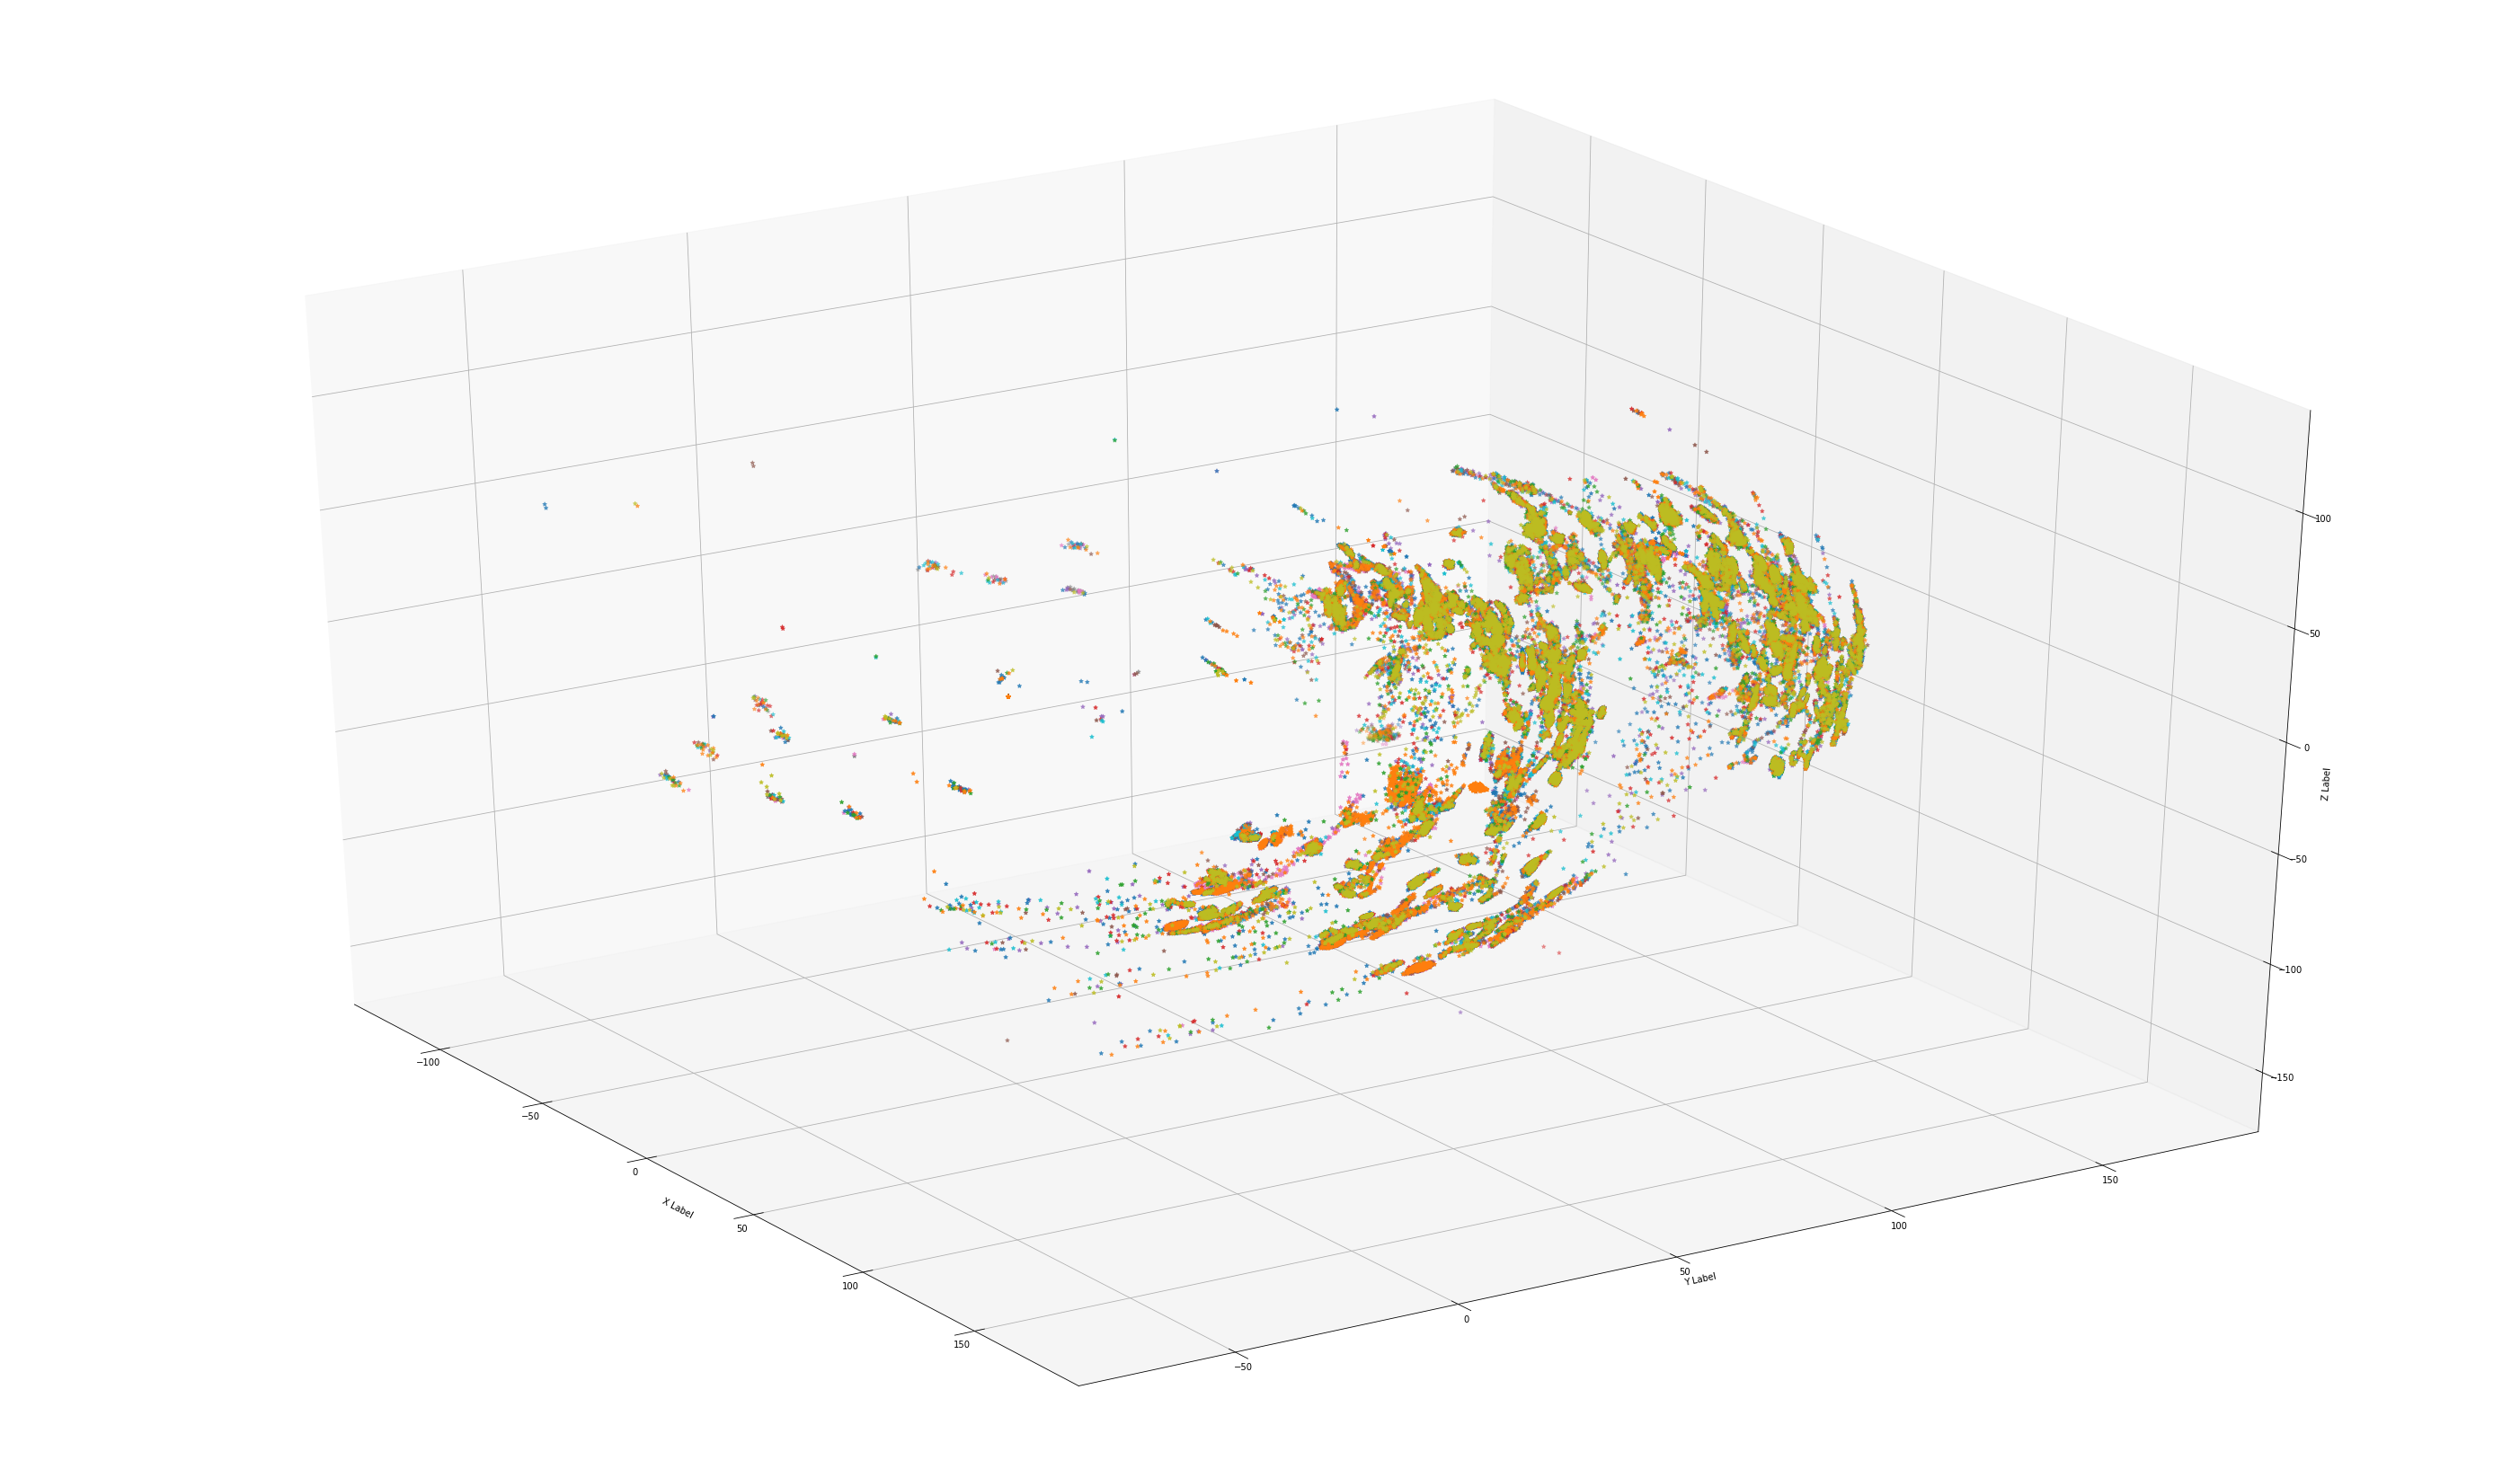

In [ ]:
# Visulization of the data and deeply exploration 
import matplotlib.pyplot as plt
data_fist=data[data['class']==1]
data_stop=data[data['class']==2]
data_point1=data[data['class']==3]
data_point2=data[data['class']==4]
data_grab=data[data['class']==5]

#plt.show()
#data_fist.drop(['class','user'],axis=1).boxplot(figsize=(50,30))
#data_fist.drop(['class','user'],axis=1).hist(figsize=(50,30))
fig1 = plt.figure(figsize=(50,30))
ax = fig1.add_subplot(111, projection='3d')
ax.scatter(data_stop['x0'],data_stop['y0'],data_stop['z0'],marker='*')
#ax.scatter(data_stop['x2'],data_stop['y2'],data_stop['z2'],marker='*')
#ax.scatter(data_stop['x2']-data_stop['x0'],data_stop['y2']-data_stop['y0'],data_stop['z2']-data_stop['z0'],marker='*')
#ax.scatter(data_stop['x4']-data_stop['x0'],data_stop['y4']-data_stop['y0'],data_stop['z4']-data_stop['z0'],marker='*')
#ax.scatter(data_stop['x6']-data_stop['x0'],data_stop['y6']-data_stop['y0'],data_stop['z6']-data_stop['z0'],marker='*')
#ax.scatter(data_stop['x8']-data_stop['x0'],data_stop['y8']-data_stop['y0'],data_stop['z8']-data_stop['z0'],marker='*')
#ax.scatter(data_stop['x11']-data_stop['x0'],data_stop['y11']-data_stop['y0'],data_stop['z11']-data_stop['z0'],marker='*')
ax.scatter(data_stop['x1'],data_stop['y1'],data_stop['z1'],marker='*')
ax.scatter(data_stop['x2'],data_stop['y2'],data_stop['z2'],marker='*')
ax.scatter(data_stop['x4'],data_stop['y4'],data_stop['z4'],marker='*')
ax.scatter(data_stop['x6'],data_stop['y6'],data_stop['z6'],marker='*')
ax.scatter(data_stop['x8'],data_stop['y8'],data_stop['z8'],marker='*')
ax.scatter(data_stop['x10'],data_stop['y10'],data_stop['z10'],marker='*')
ax.scatter(data_stop['x11'],data_stop['y11'],data_stop['z11'],marker='*')
ax.scatter(data_stop['x3'],data_stop['y3'],data_stop['z3'],marker='*')
ax.scatter(data_stop['x5'],data_stop['y5'],data_stop['z5'],marker='*')
ax.scatter(data_stop['x7'],data_stop['y7'],data_stop['z7'],marker='*')
ax.scatter(data_stop['x9'],data_stop['y9'],data_stop['z9'],marker='*')
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
ax.view_init(30, -33)
plt.show()
#ax.scatter(data_stop['x11'],data_stop['y11'],data_stop['z11'])


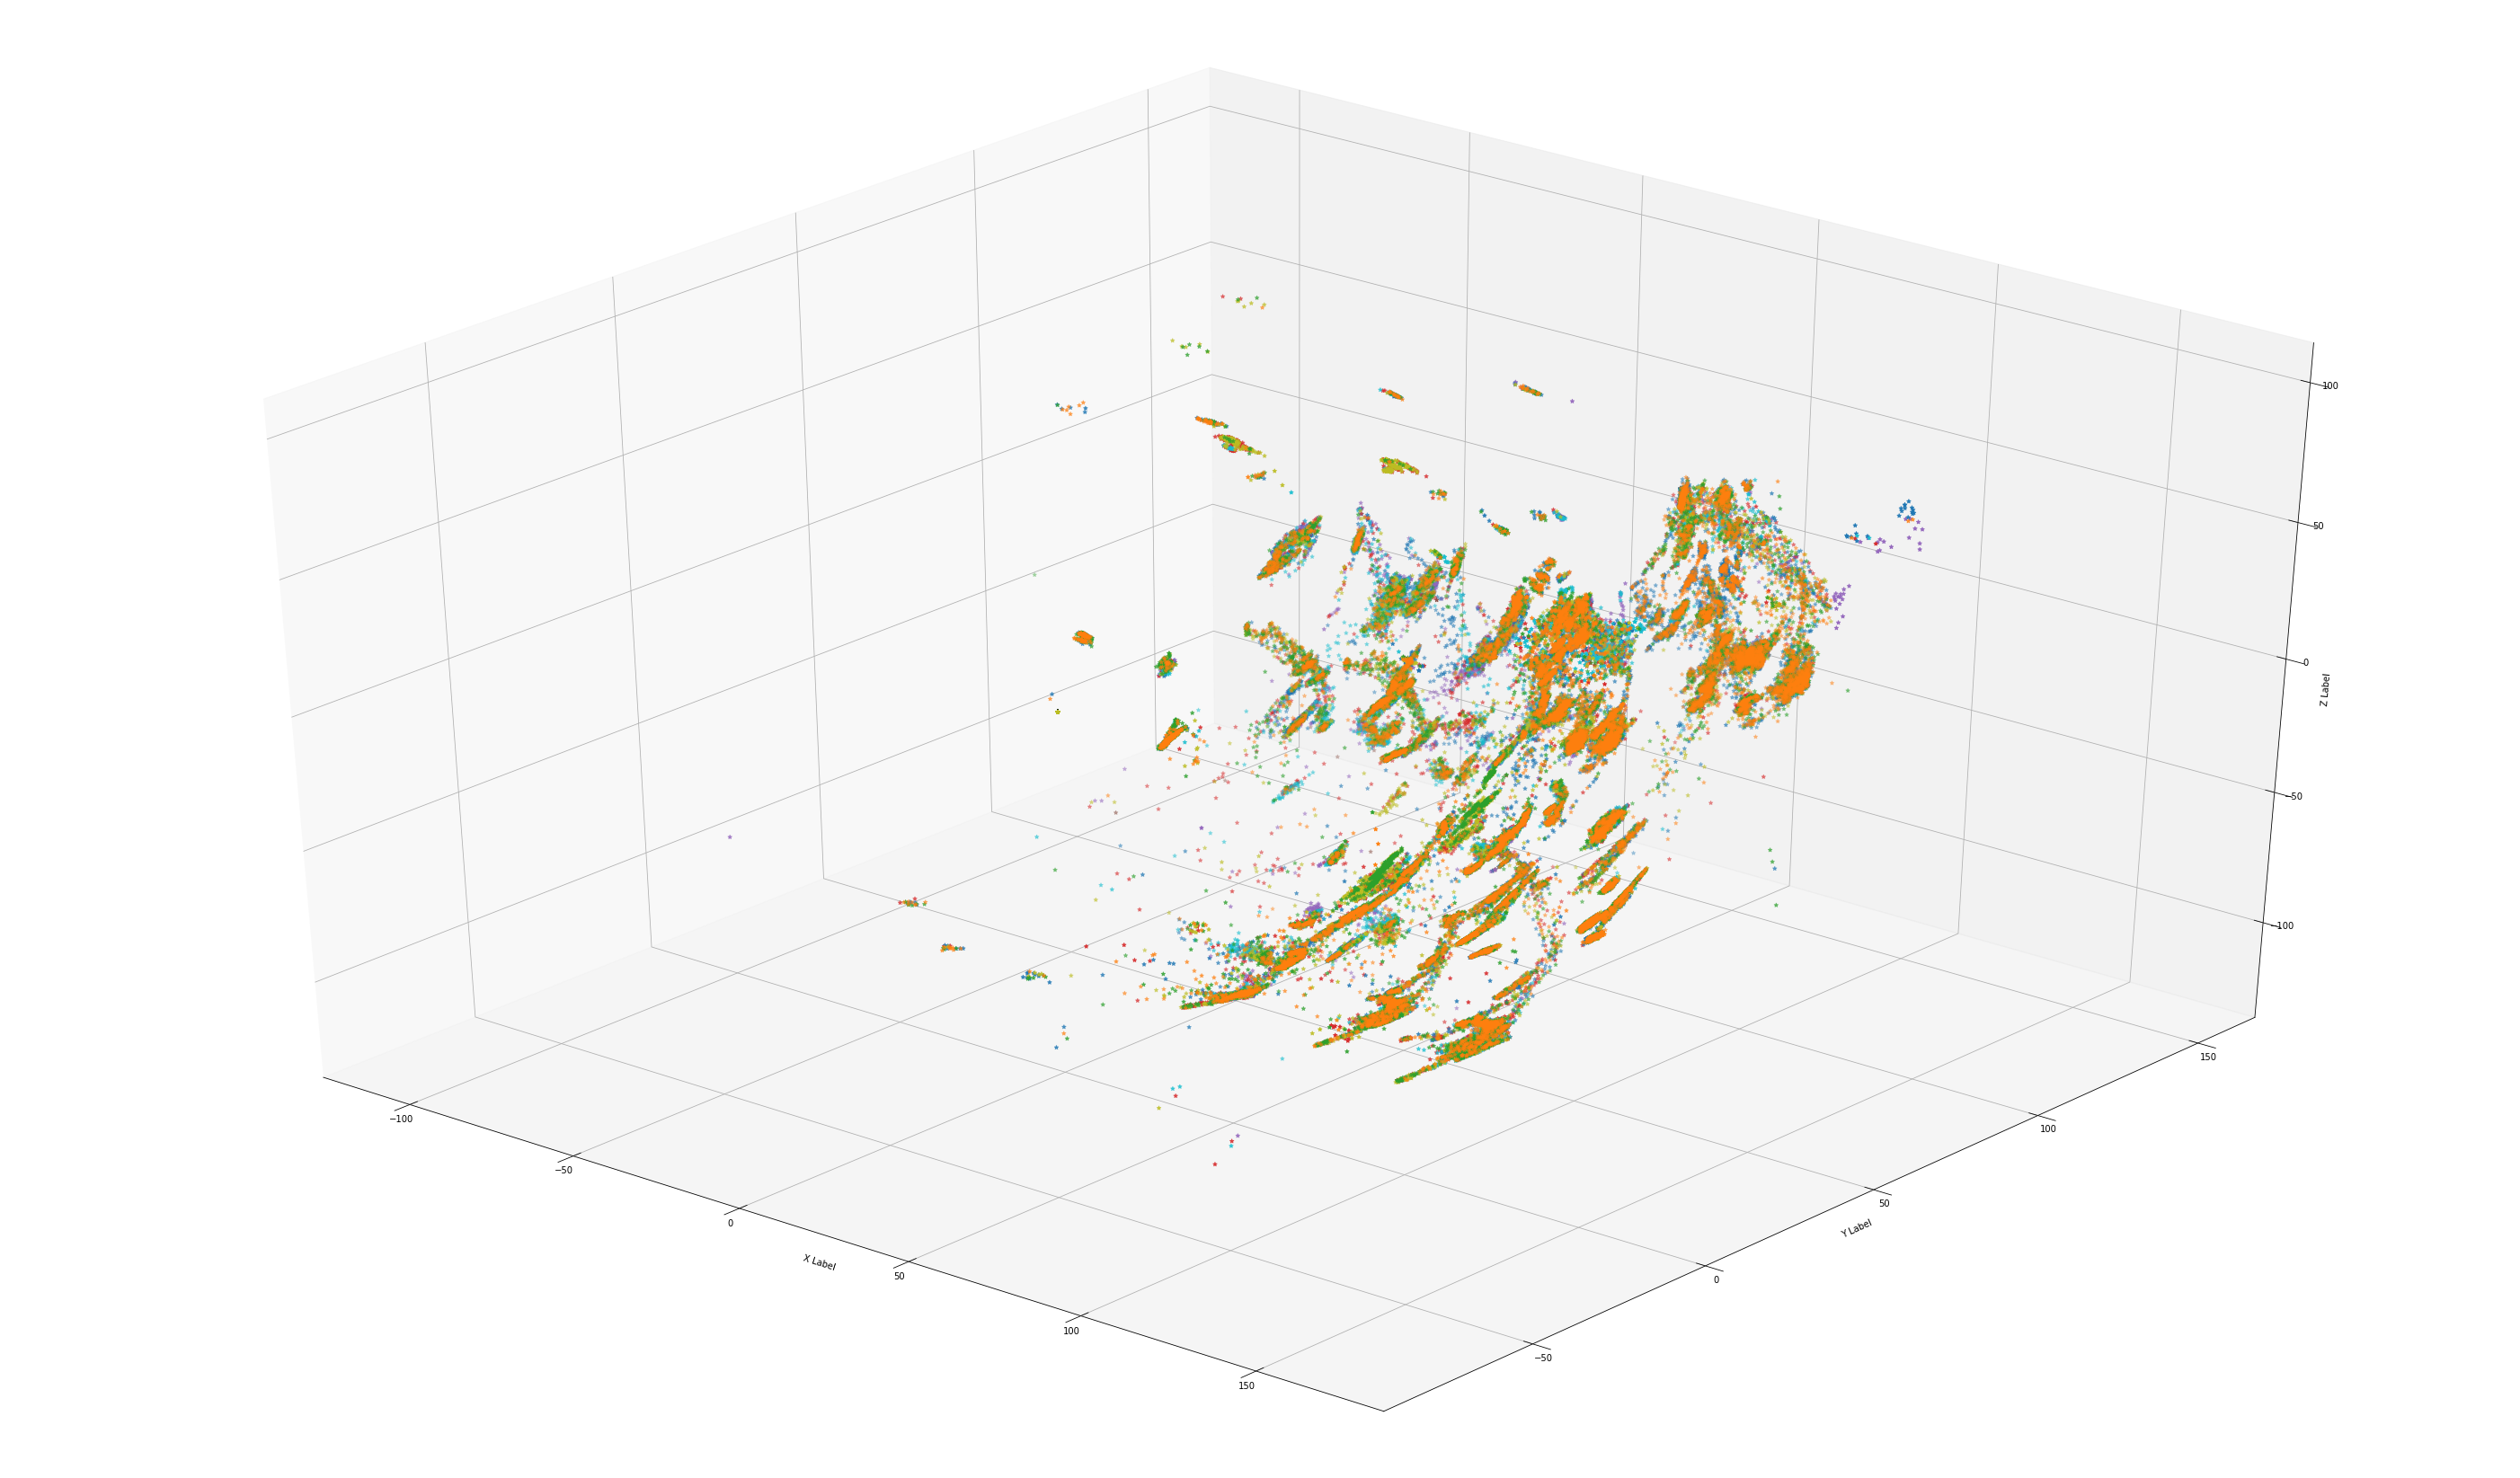

In [ ]:
fig2 = plt.figure(figsize=(50,30))
ax = fig2.add_subplot(111, projection='3d')
ax.scatter(data_point1['x0'],data_point1['y0'],data_point1['z0'],marker='*')
ax.scatter(data_point1['x1'],data_point1['y1'],data_point1['z1'],marker='*')
ax.scatter(data_point1['x2'],data_point1['y2'],data_point1['z2'],marker='*')
ax.scatter(data_point1['x4'],data_point1['y4'],data_point1['z4'],marker='*')
ax.scatter(data_point1['x6'],data_point1['y6'],data_point1['z6'],marker='*')
ax.scatter(data_point1['x8'],data_point1['y8'],data_point1['z8'],marker='*')
ax.scatter(data_point1['x10'],data_point1['y10'],data_point1['z10'],marker='*')
ax.scatter(data_point1['x11'],data_point1['y11'],data_point1['z11'],marker='*')
ax.scatter(data_point1['x3'],data_point1['y3'],data_point1['z3'],marker='*')
ax.scatter(data_point1['x5'],data_point1['y5'],data_point1['z5'],marker='*')
ax.scatter(data_point1['x7'],data_point1['y7'],data_point1['z7'],marker='*')
ax.scatter(data_point1['x9'],data_point1['y9'],data_point1['z9'],marker='*')
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
ax.view_init(35, -50)
plt.show()

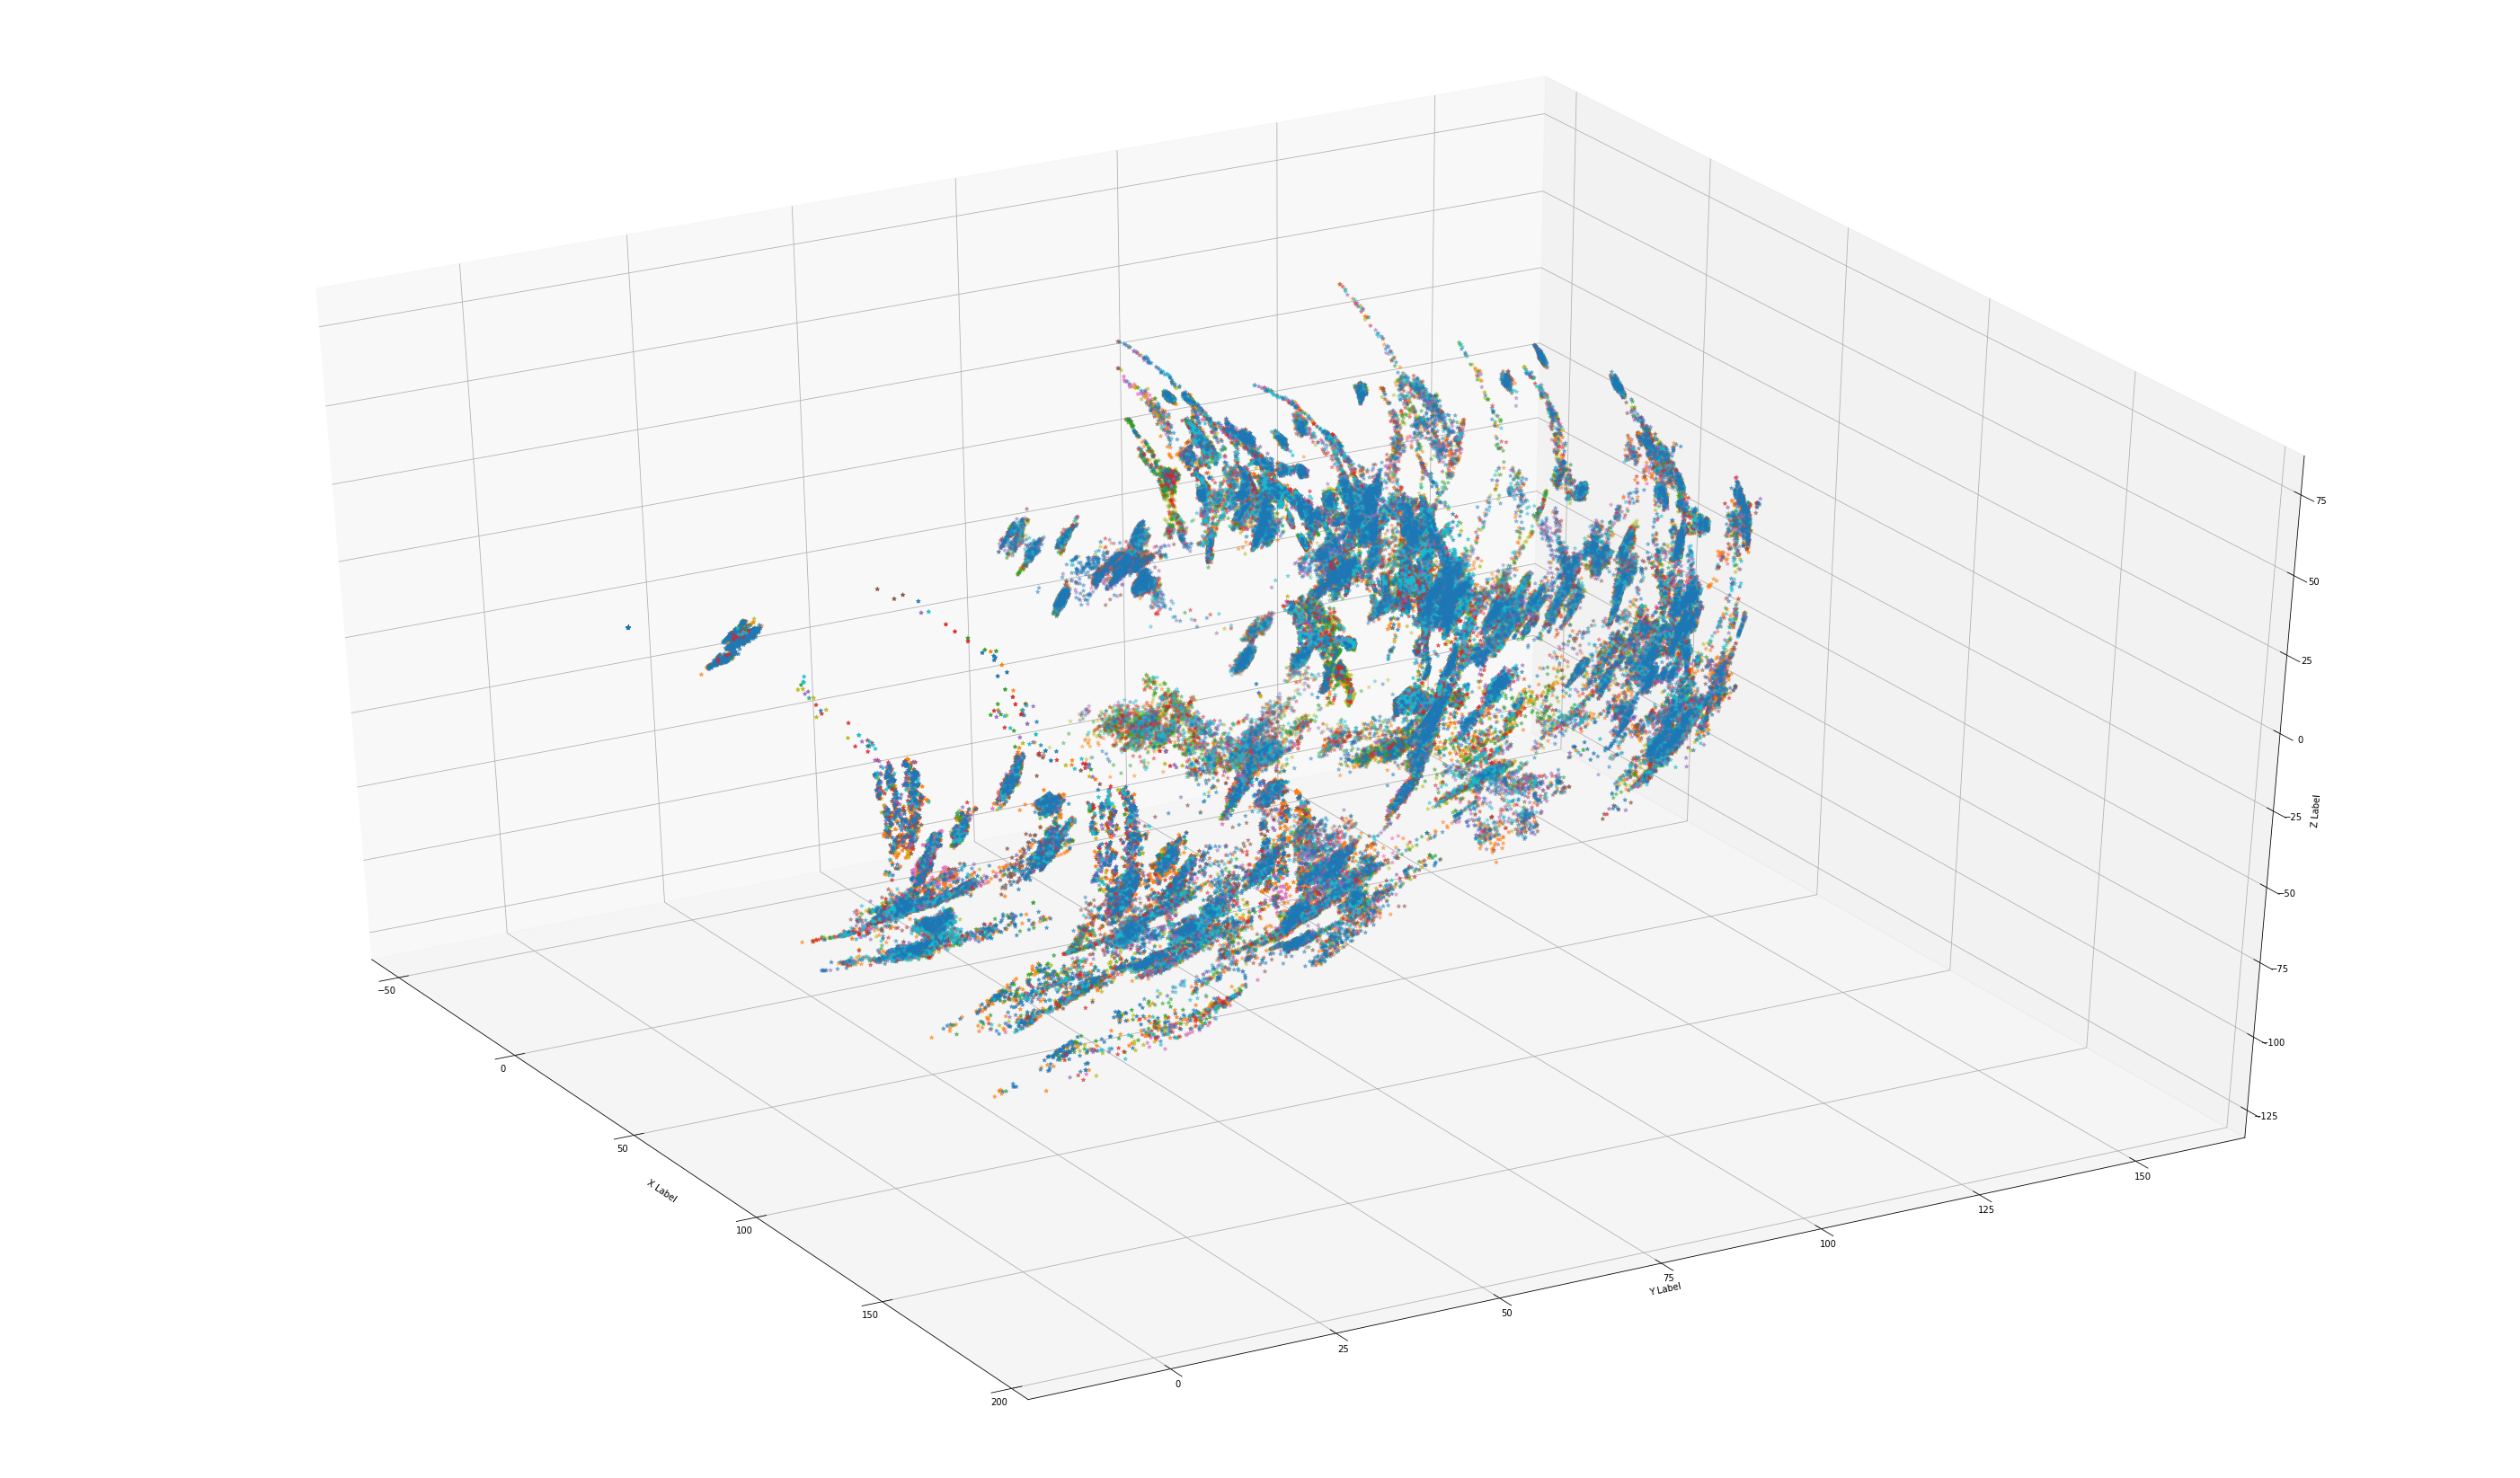

In [ ]:
fig3 = plt.figure(figsize=(50,30))
ax = fig3.add_subplot(111, projection='3d')
ax.scatter(data_grab['x0'],data_grab['y0'],data_grab['z0'],marker='*')
ax.scatter(data_grab['x1'],data_grab['y1'],data_grab['z1'],marker='*')
ax.scatter(data_grab['x2'],data_grab['y2'],data_grab['z2'],marker='*')
ax.scatter(data_grab['x4'],data_grab['y4'],data_grab['z4'],marker='*')
ax.scatter(data_grab['x6'],data_grab['y6'],data_grab['z6'],marker='*')
ax.scatter(data_grab['x8'],data_grab['y8'],data_grab['z8'],marker='*')
ax.scatter(data_grab['x10'],data_grab['y10'],data_grab['z10'],marker='*')
ax.scatter(data_grab['x11'],data_grab['y11'],data_grab['z11'],marker='*')
ax.scatter(data_grab['x3'],data_grab['y3'],data_grab['z3'],marker='*')
ax.scatter(data_grab['x5'],data_grab['y5'],data_grab['z5'],marker='*')
ax.scatter(data_grab['x7'],data_grab['y7'],data_grab['z7'],marker='*')
ax.scatter(data_grab['x9'],data_grab['y9'],data_grab['z9'],marker='*')
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
ax.view_init(35, -30)
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Figure size 3600x2160 with 0 Axes>

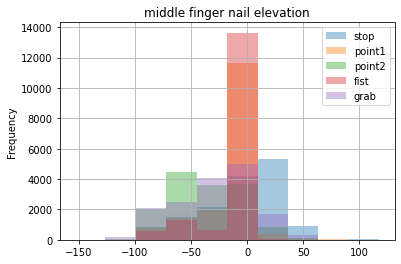

In [ ]:
from google.colab import files
d={'stop':data_stop['z6'],
   'point1':data_point1['z6'],
   'point2':data_point2['z6'],
   'fist':data_fist['z6'],
   'grab':data_grab['z6']}
x=pd.DataFrame(data=d)
plt.figure(figsize=(50,30))
x.plot(kind='hist', grid=True,legend=True,alpha=0.4, title='middle finger nail elevation')
#data_stop['z6'].hist(legend=True)
#data_point1['z6'].hist(legend=True)
plt.savefig('hist.png')
files.download("hist.png") 

In order to apply machien laerning algorithms, the data should be splited into training set and testing(validation) set. 20% of the data was assigned to testing / validation set. 

In [ ]:
data.corr()

,class,user,x0,y0,z0,x1,y1,z1,x2,y2,z2,x3,y3,z3,x4,y4,z4,x5,y5,z5,x6,y6,z6,x7,y7,z7,x8,y8,z8,x9,y9,z9,x10,y10,z10,x11,y11,z11
class,1.000000,-0.030714,0.080171,0.081755,0.051857,-0.010569,0.144086,0.089920,-0.052392,0.169251,0.095538,-0.038541,0.188137,0.070676,-0.001833,0.217800,0.016682,0.118117,0.286471,-0.128248,0.244801,0.382665,-0.294747,0.190201,0.346837,-0.302580,0.142200,0.295887,-0.199754,0.077748,0.196831,-0.116173,-0.022681,-0.000425,0.009527,0.007098,-0.008032,-0.001187
user,-0.030714,1.000000,-0.013757,0.070174,0.192040,-0.042662,0.041749,0.183294,-0.059534,0.000980,0.155609,-0.050297,-0.013541,0.134955,-0.044322,-0.034495,0.107806,0.111934,0.070293,-0.060707,0.023656,0.011250,0.018213,-0.036547,0.032605,0.042398,-0.044390,-0.015268,0.026573,-0.054690,-0.066968,-0.017658,0.005976,-0.093513,-0.034973,-0.011103,0.005872,0.003617
x0,0.080171,-0.013757,1.000000,-0.285309,-0.236421,0.124098,-0.009081,0.033114,0.106138,-0.012697,0.023501,0.093511,-0.006436,0.018239,0.080276,0.006414,0.022848,0.051871,0.018893,0.020925,0.060915,0.029225,-0.007672,0.012168,0.022320,0.010250,0.009383,0.024830,-0.015050,-0.016397,0.035527,-0.008773,0.073414,0.082989,-0.063022,0.021427,-0.006232,-0.014261
y0,0.081755,0.070174,-0.285309,1.000000,0.551040,-0.001308,0.133272,0.225575,0.005399,0.082107,0.187811,0.016491,0.066189,0.158256,0.017708,0.049928,0.117711,0.090073,0.083388,0.024691,0.141651,0.109987,-0.028493,0.150406,0.141204,-0.070359,0.178794,0.086867,-0.120592,0.180759,0.074677,-0.120625,0.112602,0.053587,-0.105036,0.043139,-0.028204,-0.018787
z0,0.051857,0.192040,-0.236421,0.551040,1.000000,0.014811,0.209621,0.464169,0.008759,0.149608,0.420445,0.021442,0.131963,0.385786,0.018701,0.116677,0.327553,0.147125,0.173440,0.168633,0.204950,0.202808,0.072592,0.245512,0.243942,-0.051686,0.258688,0.186804,-0.161113,0.236340,0.120245,-0.189015,0.163524,0.085154,-0.150029,-0.005845,0.000536,0.001921
x1,-0.010569,-0.042662,0.124098,-0.001308,0.014811,1.000000,-0.293841,-0.261201,0.139524,-0.050989,-0.012305,0.132345,-0.040787,-0.016934,0.109251,-0.038411,-0.008858,0.060707,-0.029705,0.013402,0.050056,-0.019345,0.005486,-0.009862,-0.043615,0.036222,-0.024690,-0.055084,0.007531,-0.044173,-0.028055,0.016745,0.046724,0.058456,-0.040239,0.035940,-0.017194,-0.015618
y1,0.144086,0.041749,-0.009081,0.133272,0.209621,-0.293841,1.000000,0.572805,-0.027760,0.108027,0.184192,-0.028325,0.107171,0.173591,-0.010659,0.100404,0.136489,0.078034,0.130869,0.034713,0.155208,0.162675,-0.043312,0.183890,0.212616,-0.098087,0.208298,0.169628,-0.142169,0.211795,0.141893,-0.146720,0.151181,0.100668,-0.122460,0.039333,-0.018933,-0.015854
z1,0.089920,0.183294,0.033114,0.225575,0.464169,-0.261201,0.572805,1.000000,-0.009229,0.175180,0.455480,-0.010130,0.161909,0.427645,0.002731,0.145004,0.362252,0.130364,0.191457,0.195836,0.207294,0.232000,0.079845,0.271965,0.291497,-0.053134,0.289446,0.241736,-0.161065,0.263414,0.185479,-0.199406,0.198861,0.131758,-0.164666,-0.002218,0.004136,0.003256
x2,-0.052392,-0.059534,0.106138,0.005399,0.008759,0.139524,-0.027760,-0.009229,1.000000,-0.316751,-0.299815,0.142310,-0.058302,-0.030257,0.115199,-0.057810,-0.016123,0.052898,-0.039449,0.028416,0.034140,-0.049126,0.019462,-0.036421,-0.078954,0.062368,-0.042170,-0.091391,0.028722,-0.047491,-0.066053,0.022785,0.025864,0.033286,-0.029326,0.022290,-0.011064,-0.004627
y2,0.169251,0.000980,-0.012697,0.082107,0.149608,-0.050989,0.108027,0.175180,-0.316751,1.000000,0.587827,-0.052874,0.137973,0.184796,-0.018870,0.167732,0.146331,0.093732,0.188116,0.034993,0.174800,0.223733,-0.044308,0.216388,0.275407,-0.111957,0.251495,0.237210,-0.173991,0.248588,0.195049,-0.178408,0.190231,0.138712,-0.151915,0.039350,-0.025530,-0.022108


In [ ]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(data, test_size=0.2, random_state=42)
train_labels=train.iloc[:,0]; # mpg is the training labels 
train_data=train.drop(['class' ,'user'],axis=1) # drop the mpg column from the training data
test_labels=test.iloc[:,0];
test_data=test.drop(['class' ,'user'],axis=1)

Then, the data needs to be scalared in order to icrease the algorithms performance. 

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
#scaler.fit(train_data)
#print(scaler.mean_)
data_tr = scaler.fit_transform(data.drop(['class','user'], axis=1))
train_data_tr = scaler.fit_transform(train_data)
test_data_tr = scaler.transform(test_data)

The first algorithm to be applied is SVM 

In [ ]:
from sklearn.svm import SVC
#svm_clf = SVC(kernel='poly', degree=4)#defaults: kernel="rbf", C=1.0) #Try coef0=1, C=5
svm_clf = SVC(kernel="poly", gamma=0.009, degree=2, C=10) #This uses a Gaussian kernel
svm_clf.fit(train_data_tr, train_labels)
pred_svm = svm_clf.predict(test_data_tr)
from sklearn.metrics import classification_report
print(classification_report(test_labels, pred_svm,
                            target_names=['fist','stop','point1','point2','grab']))

              precision    recall  f1-score   support

        fist       0.98      0.99      0.99      3247
        stop       0.98      0.97      0.98      3005
      point1       0.97      0.98      0.98      3215
      point2       0.98      0.97      0.97      3008
        grab       0.98      0.98      0.98      3144

    accuracy                           0.98     15619
   macro avg       0.98      0.98      0.98     15619
weighted avg       0.98      0.98      0.98     15619



In [ ]:
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import LinearSVC
from sklearn import svm
from sklearn.model_selection import cross_val_predict
# Binarize the output
labels_bi = label_binarize(data['class'], classes=[ 1, 2, 3, 4,5])
n_classes = labels_bi.shape[1]

# shuffle and split training and test sets
train_data_bi, test_data_bi, train_labels_bi, test_labels_bi = train_test_split(data.drop(['class','user'],axis=1),labels_bi, test_size=.2,
                                                    random_state=42)

# Learn to predict each class against the other
classifier = OneVsRestClassifier(svm.SVC(kernel='linear', probability=True,
                                 random_state=42))
#y_score = classifier.fit(train_data_bi, train_labels_bi).decision_function(test_data_bi)

#print(test_labels_bi)
pred_svm_bi=label_binarize(pred_svm, classes=[ 1, 2, 3, 4,5])
pred_svm_bool=np.array(pred_svm_bi,dtype=bool)
train_labels_bool=np.array(train_labels_bi,dtype=bool)
y_scores = cross_val_predict(svm_clf, train_data_tr, train_labels, cv=3, method="decision_function")

In [ ]:
print(y_scores)

[[ 3.26551292  4.29619553  0.80922142 -0.30839537  2.21488912]
 [ 3.1857688  -0.26585052  4.29364886  1.76098836  0.77132542]
 [-0.30293093  4.29526609  2.05841861  0.87009279  3.24159973]
 ...
 [-0.29300651  3.00367297  2.22477395  4.27761041  1.05605462]
 [ 4.29276345  2.04352494  3.26956072 -0.29878203  0.75114305]
 [ 3.07384464 -0.26349451  4.29191951  1.76904205  0.81130899]]


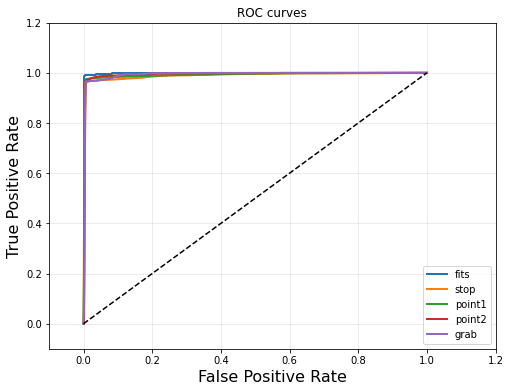

In [ ]:
#print(y_scores)
from sklearn.metrics import roc_curve
fpr1, tpr1, thresholds = roc_curve(train_labels_bool[:,0], y_scores[:,0])
fpr2, tpr2, thresholds = roc_curve(train_labels_bool[:,1], y_scores[:,1])
fpr3, tpr3, thresholds = roc_curve(train_labels_bool[:,2], y_scores[:,2])
fpr4, tpr4, thresholds = roc_curve(train_labels_bool[:,3], y_scores[:,3])
fpr5, tpr5, thresholds = roc_curve(train_labels_bool[:,4], y_scores[:,4])
plt.figure(figsize=(8, 6))
plt.plot(fpr1, tpr1,  linewidth=2, label='fits')
plt.plot(fpr2, tpr2,  linewidth=2, label='stop')
plt.plot(fpr3, tpr3,  linewidth=2, label='point1')
plt.plot(fpr4, tpr4,  linewidth=2, label='point2')
plt.plot(fpr5, tpr5,  linewidth=2, label='grab')
plt.plot([0, 1], [0, 1], 'k--')
plt.axis([0, 1, 0, 1])
plt.legend()
plt.grid(alpha=0.3)
plt.xlim(-0.1,1.2)
plt.ylim(-0.1,1.2)
plt.title('ROC curves')
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.show()

<Figure size 576x432 with 0 Axes>

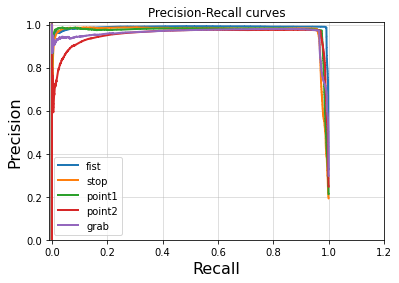

<Figure size 576x432 with 0 Axes>

In [ ]:
from sklearn.metrics import precision_recall_curve
precisions1, recalls1, thresholds1 = precision_recall_curve(train_labels_bool[:,0], y_scores[:,0])
precisions2, recalls2, thresholds2 = precision_recall_curve(train_labels_bool[:,1], y_scores[:,1])
precisions3, recalls3, thresholds3 = precision_recall_curve(train_labels_bool[:,2], y_scores[:,2])
precisions4, recalls4, thresholds4 = precision_recall_curve(train_labels_bool[:,3], y_scores[:,3])
precisions5, recalls5, thresholds5 = precision_recall_curve(train_labels_bool[:,4], y_scores[:,4])
plt.plot(recalls1, precisions1, linewidth=2,label='fist')
plt.plot(recalls2, precisions2, linewidth=2,label='stop')
plt.plot(recalls3, precisions3, linewidth=2,label='point1')
plt.plot(recalls4, precisions4, linewidth=2,label='point2')
plt.plot(recalls5, precisions5, linewidth=2,label='grab')
plt.xlabel("Recall", fontsize=16)
plt.ylabel("Precision", fontsize=16)
plt.axis([0, 1, 0, 1])
plt.legend()
plt.grid(alpha=0.5)
plt.xlim(-0.01,1.2)
plt.ylim(0,1.01)
plt.title('Precision-Recall curves')
plt.figure(figsize=(8, 6))

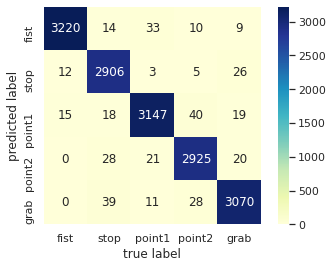

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns; sns.set()
mat = confusion_matrix(test_labels, pred_svm)
sns.heatmap(mat.T, square=True, annot=True, cmap="YlGnBu",fmt='d', cbar=True,
            xticklabels=['fist','stop','point1','point2','grab'],
            yticklabels=['fist','stop','point1','point2','grab'])
plt.xlabel('true label')
plt.ylabel('predicted label');

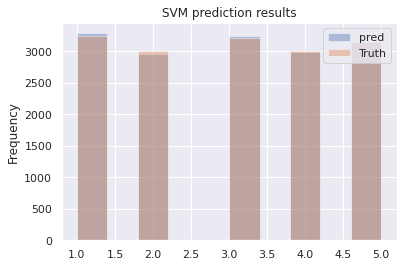

In [ ]:
d={'pred':pred_svm,
   'Truth':test_labels}
pred_test_svm_df=pd.DataFrame(data=d)
pred_test_svm_df.plot(kind='hist', grid=True,legend=True,alpha=0.4, title='SVM prediction results')
#print(test_labels)

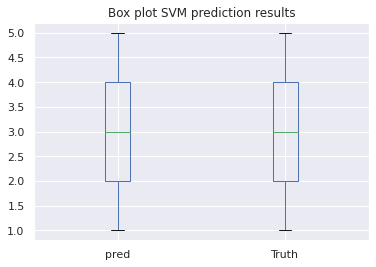

In [ ]:
pred_test_svm_df.plot(kind='box', grid=True,legend=True, title='Box plot SVM prediction results')

The second algorithm is K-Means

In [ ]:
from sklearn.cluster import KMeans
k_means = KMeans(n_clusters=5, max_iter=100000, init='k-means++')
k_means.fit(train_data_tr)
pred_kmeans = k_means.predict(test_data_tr)+1
#plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)
#plt.savefig('test.jpeg')
#plt.show()
print(classification_report(test_labels, pred_kmeans,
                            target_names=['fist','stop','point1','point2','grab']))


              precision    recall  f1-score   support

        fist       0.06      0.09      0.08      3247
        stop       0.69      0.43      0.53      3005
      point1       0.01      0.01      0.01      3215
      point2       0.07      0.13      0.09      3008
        grab       0.00      0.00      0.00      3144

    accuracy                           0.13     15619
   macro avg       0.17      0.13      0.14     15619
weighted avg       0.16      0.13      0.14     15619



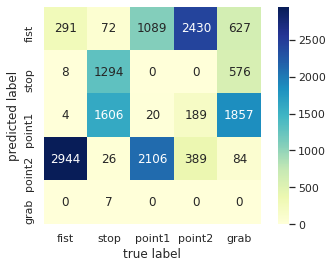

In [ ]:
#plot
mat = confusion_matrix(test_labels, pred_kmeans)
sns.heatmap(mat.T ,square=True, annot=True,cmap="YlGnBu", fmt='d', cbar=True,
            xticklabels=['fist','stop','point1','point2','grab'],
            yticklabels=['fist','stop','point1','point2','grab'])
plt.xlabel('true label')
plt.ylabel('predicted label');

As one can see, the results of the k-means is not good enough. Then try to apply PCA to reduce the dimenstion before apply the K-means 

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components = .80)
data_tr_reduced = pca.fit_transform(data_tr)
#test_data_tr_reduced = pca.fit_transform(test_data_tr)
print(pca.explained_variance_ratio_)
# re split the test set
train_tr_reduced, test_tr_reduced = train_test_split(data_tr_reduced, test_size=0.2, random_state=42)

[0.20806075 0.06063848 0.05546976 0.05279337 0.04704866 0.03946054
 0.0387745  0.03875924 0.03778031 0.03685949 0.03337741 0.03033825
 0.02799755 0.02401575 0.02237239 0.02152238 0.01879288 0.01713966]


In [ ]:
# redo the k-means
k_means = KMeans(n_clusters=5, max_iter=100000, init='k-means++')
k_means.fit(train_tr_reduced)
pred_kmeans_new = k_means.predict(test_tr_reduced)+1
print(classification_report(test_labels, pred_kmeans_new,
                            target_names=['fist','stop','point1','point2','grab']))

              precision    recall  f1-score   support

        fist       0.53      0.92      0.67      3247
        stop       0.70      0.41      0.52      3005
      point1       0.00      0.00      0.00      3215
      point2       0.53      0.78      0.63      3008
        grab       0.00      0.00      0.00      3144

    accuracy                           0.42     15619
   macro avg       0.35      0.42      0.36     15619
weighted avg       0.35      0.42      0.36     15619



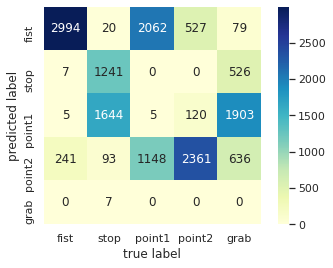

In [ ]:
# plot the new K-means resutls after PCA 
mat = confusion_matrix(test_labels, pred_kmeans_new)
sns.heatmap(mat.T, square=True, cmap="YlGnBu",annot=True, fmt='d', cbar=True,
            xticklabels=['fist','stop','point1','point2','grab'],
            yticklabels=['fist','stop','point1','point2','grab'])
plt.xlabel('true label')
plt.ylabel('predicted label');

We can find that the PCAhas reduced the attributes so that 95% of the variance has been kept. The resutls show that after PCA, the test score has rised from 0.026 to 0.23. 

The Third algorithm is deep neural networks, and multiclass classification is the target format. 

In [ ]:
import tensorflow as tf
from tensorflow import keras

# replace 1-5 by 0-4
train_labels_5=train_labels.subtract(1)
test_labels_5=test.iloc[:,0].subtract(1)

model = keras.models.Sequential([
keras.layers.Flatten(input_shape=[36]),
keras.layers.BatchNormalization(),
keras.layers.Dense(120, activation="relu", kernel_initializer="HeNormal"),
keras.layers.Dropout(rate=0.4),
keras.layers.Dense(60, activation="relu", kernel_initializer="HeNormal"),
keras.layers.Dropout(rate=0.4),
keras.layers.Dense(30, activation="relu", kernel_initializer="HeNormal"),
keras.layers.Dropout(rate=0.1),
keras.layers.Dense(5, activation= 'softmax')
])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 36)                0         
_________________________________________________________________
batch_normalization (BatchNo (None, 36)                144       
_________________________________________________________________
dense (Dense)                (None, 120)               4440      
_________________________________________________________________
dropout (Dropout)            (None, 120)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 60)                7260      
_________________________________________________________________
dropout_1 (Dropout)          (None, 60)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 30)                1

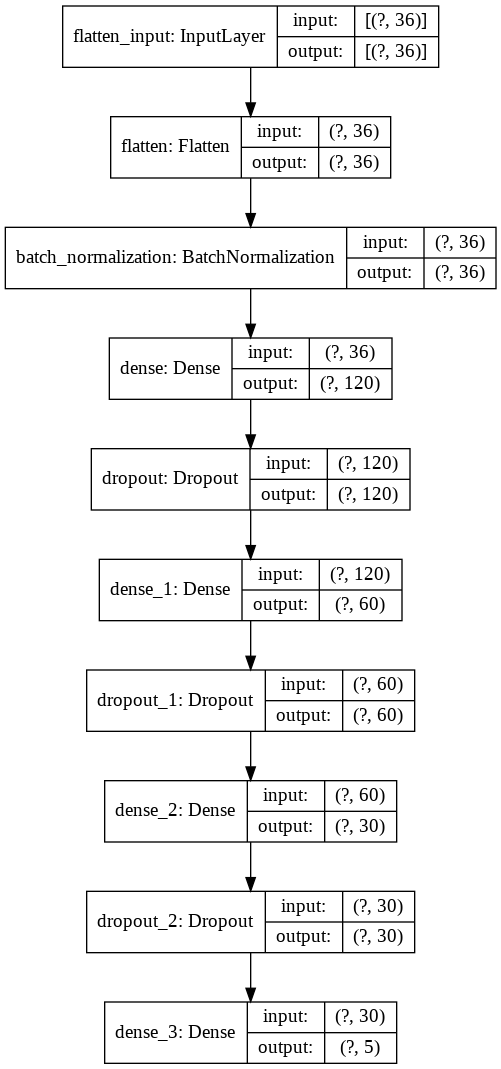

In [ ]:
keras.utils.plot_model(model, show_shapes=True) # Try rankdir = 'LR', to_file='fd.png'

In [ ]:
# Optimizer
import keras.optimizers
opt = tf.keras.optimizers.Adam(learning_rate=0.01,beta_1=0.9,beta_2=0.999,epsilon=1e-07,amsgrad=False,name="Adam",) # optimizer 2 was degiend to improve the fitting performance
model.compile(loss="sparse_categorical_crossentropy",
optimizer=opt,#keras.optimizers.SGD(learning_rate=lrn_schedule),  #use opt if so
metrics=["accuracy"])

In [ ]:
#train_labels_5=train_labels-1
#print(train_labels_5)
#test_labels_5=test_labels-1
history = model.fit(train_data_tr, train_labels_5, epochs=30, validation_data=(test_data_tr, test_labels_5), verbose=1)# Turn verbose=1 to printing epochs

Epoch 1/30
1953/1953 [==============================] - 3s 2ms/step - loss: 0.5722 - accuracy: 0.7982 - val_loss: 0.2869 - val_accuracy: 0.9160
Epoch 2/30
1953/1953 [==============================] - 3s 2ms/step - loss: 0.4379 - accuracy: 0.8527 - val_loss: 0.2454 - val_accuracy: 0.9193
Epoch 3/30
1953/1953 [==============================] - 3s 2ms/step - loss: 0.4098 - accuracy: 0.8672 - val_loss: 0.2592 - val_accuracy: 0.9227
Epoch 4/30
1953/1953 [==============================] - 3s 2ms/step - loss: 0.3928 - accuracy: 0.8759 - val_loss: 0.1932 - val_accuracy: 0.9417
Epoch 5/30
1953/1953 [==============================] - 3s 2ms/step - loss: 0.3853 - accuracy: 0.8780 - val_loss: 0.2008 - val_accuracy: 0.9405
Epoch 6/30
1953/1953 [==============================] - 3s 2ms/step - loss: 0.3782 - accuracy: 0.8827 - val_loss: 0.2035 - val_accuracy: 0.9383
Epoch 7/30
1953/1953 [==============================] - 3s 2ms/step - loss: 0.3776 - accuracy: 0.8836 - val_loss: 0.1762 - val_accuracy:

489/489 [==============================] - 0s 782us/step
73570    2
12958    5
4912     3
55992    5
56267    5
        ..
11925    3
74421    3
12081    3
11541    3
36015    1
Name: class, Length: 15619, dtype: int64


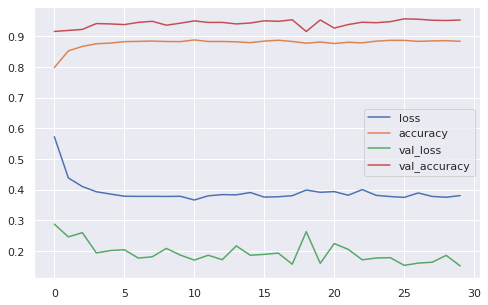

In [ ]:
# PLots
pred_dnn=model.predict(test_data_tr,verbose=1)
print(test_labels)
import matplotlib.pyplot as plt
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca()
#plt.savefig(fname='e.png',dpi=200) # save figures as .jpeg
plt.show()

In [ ]:
results=pd.DataFrame(pred_dnn)
pred_results=results.idxmax(axis=1)+1
#print(pred_results)
print(classification_report(test_labels, pred_results,
                            target_names=['fist','stop','point1','point2','grab']))

              precision    recall  f1-score   support

        fist       0.99      0.99      0.99      3247
        stop       0.97      0.92      0.94      3005
      point1       0.91      0.97      0.94      3215
      point2       0.97      0.93      0.95      3008
        grab       0.94      0.95      0.95      3144

    accuracy                           0.95     15619
   macro avg       0.95      0.95      0.95     15619
weighted avg       0.95      0.95      0.95     15619

